### <span style="color:blue">FDTD Demonstation 1, Version 23 May 2018 </span>

## Nonstandard Finite Difference Time Domain (FDTD) Algorithm to Simulate Wave Propagation in One Dimension

We introduce and compare the standard (S) and the nonstandard (NS) FDTD algorithms to solve a one-dimensional scattering problem.  

#### This algorithm and other FDTD algorithms are explained in complete detail in 

#### <span style="color:blue">*Computing the Flow of Light, the Nonstandard FDTD Methodology for Photonics Design*, 
<span style="color:blue"> **James B. Cole and Saswatee Banerjee, SPIE Press, 2017 (ISBN = 9781510604810)** </span>

**James B. Cole,&nbsp; &nbsp;    James.Cole.ctr@afit.edu, &nbsp;  james.b.cole.3142@gmail.com** <br/>
**US Air Force Institute of Technology, Senior Fellow of the National Research Council**

#### Using the *Standard* (S) and *Nonstandard* (NS) finite difference time domain algorithm (FDTD), this program solves the one-dimensional wave equation with a source. In this demonstation we simulate the scattering of a pulse off thin layer, and show that the NS-FDTD algorithm gives much better accuracy than the S-FDTD algorithm on a coarse grid.  

Wave equation with a source and variable index of refraction
\begin{equation*}
\color{blue}{
\hspace{1.0cm} \partial^2_t \psi(x,t) = \frac{v^2_0}{n(x)^2} \partial^2_x \psi(x,t) + s(x,t) }, \hspace{5.0cm} (1)
\end{equation*}

$\psi$ = wave function, $v_0$ = vacuum phase velocity, $n$ =  position-dependent index of refraction; $s$ is the source. 

#### <span style="color:blue"> Define a Finite Difference Operator </span>
The finite difference operator for $\partial_x^2$ is
\begin{equation*}
\color{blue}{
d_x^2 f(x,t) = f(x - \Delta x,t) + f(x - \Delta x,t) + 2 f(x,t) }. \hspace{4.0cm} (2)
\end{equation*}
Then
\begin{equation*}
\color{blue}{
\hspace{-6.7cm}   \partial_x^2 f(x,t) \approx \frac{d_x^2 f(x,t)} {\Delta x^2} }.
\end{equation*}

In the program $\partial_x^2 \rightarrow$ dxx 


### <span style="color:blue"> The *Standard* (S) FDTD algorithm
The S-model of the wave eqn. (1) is 

\begin{equation*}
\color{blue}{
d_t^2 \psi(x,t) = \frac{v_0^2 \Delta t^2}{n(x)^2 \Delta x^2} d_x^2 \psi(x,t) + \Delta t^2 s(x,t) } \hspace{5cm} (3) 
\end{equation*}

where $d_t^2$ is defined analogously to $d_x^2$ &nbsp; (see above). Expanding $d_t^2 \psi(x,t)$ using (2), we obtain the 
#### <span style="color:blue"> S-FDTD algorithm </span>
\begin{equation*}
\color{blue} {
\psi(x, t+ \Delta t) = - \psi(x, t - \Delta t) + \left[ 2 + \frac{v_0^2 \Delta t^2}{n(x)^2 \Delta x^2} d_x^2 \right]\psi(x, t) + s(x,t) } .    \hspace{0.5cm} (4)
\end{equation*}

### <span style="color:blue"> The *Nonstandard* (NS) FDTD algorithm 
The NS-model of the wave eqn. is 

\begin{equation*}
\color{blue}{
d_t^2 \psi(x,t) = \frac{\tilde{v}_0^2 } {\tilde{n}(x)^2 } d_x^2 \psi(x,t) + \tilde{s}(x,t), } \hspace{6.2cm} (5) 
\end{equation*}

where

\begin{equation*}
\color{blue}{
 \hspace{-6.0cm}
\tilde{v}_0 = \frac{ \sin (\omega \Delta t /2) } { \sin (k_0 \Delta x /2) } \,\,
} 
\rm{and} \,\,
\color{blue}{
\tilde{n} = \frac{ \sin (n k_0 \Delta x /2)} { \sin (k_0 \Delta x /2) } }
\end{equation*}
<br\>
are, respectively the vacuum velocity and index of refraction in the NS model, and $\tilde{s}$ is the NS-source. For harmonic time dependence, for example $  \color{blue}{ s(t) = A \sin(\omega t) } $ of angular frequency $\omega$ and amplitude $A$ (position dependence, which is the same in both the S- and NS-models, is omitted), the NS-source is modeled by

$  \color{blue}{ s(t) = \tilde{A} \sin(\omega t) } $, where the NS-amplitude is
\begin{equation*}
\color{blue}{
 \hspace{-6.8cm}   \tilde{A} = 4 \frac{ \sin(\omega \Delta t / 2) }{ \tan(\omega \Delta t / 2) } \, A}
\end{equation*}




The NS-FDTD algorithm becomes

#### <span style="color:blue"> NS-FDTD algorithm </span>
\begin{equation*}
\color{blue} {
\hspace{-0.5cm}  \psi(x, t+ \Delta t) = - \psi(x, t - \Delta t) + \left[ 2 + \frac{\tilde{v}_0^2}{\tilde{n}^2} d_x^2 \right]\psi(x, t) + \tilde{s}(x,t) } .    \hspace{2.0cm} (6)
\end{equation*}




### <span style="color:blue"> Numerical Stability
    
The S-FDTD algorithm is numerically stable if

\begin{equation*} \color{blue}{ 
   0 < \frac{v_0 \Delta t}{n(x) \Delta x}  \le 1.0  }   \hspace{6cm}
\end{equation*}

and the stability condition for NS-FDTD is 

\begin{equation*} \color{blue}{ 
   0 < \frac{\tilde{v}_0 } {\tilde{n}(x) }   \le 1.0  } \hspace{6cm}
\end{equation*}
everywhere in the computational domain. 

These are called the **CFL conditions** (after Courant, Friedrich and Levy) stability condition. In addition each Fourier component present in $ \psi $ must satisfy the **Nyquist Condition**, 
$ \color{blue}{ \lambda / \Delta x > 2 } $ and $ \color{blue}{ T / \Delta t > 2 } $. 

### <span style="color:blue">The Computational Boundary

In many cases we want imitate an infinite physical within a finite computational one.To do this we need to implement what is called an absorbing boundary condition (ABC). In one dimension this relatively simple. In more than one dimension it is more difficult. More advanced ABCs are given in our book, but here we use 

<span style="color:blue">
\begin{align}
      \psi \left( N \Delta x, t+ \Delta t \right)      & = \psi \left( \, (N-1) \Delta x, t \right) \hspace{6cm} (7) \\
                 \psi \left( 0, t+ \Delta t \right)    & = \psi \left( \Delta x, t \right), 
\end{align}
</span>

where the computational domain is $0 \le x \le N \Delta x$. This ABC is exact if 
$ \color{blue}{ v_0 \Delta t / \Delta x = 1 }$, and is <span style="color:blue"> ***numerically stable*** </span> if 
$ \color{blue}{ v_0 \Delta t / \Delta x \le 1 } $

In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

####  <span style="color:blue"> Choose S- or NS-FDTD </span> 
**Alg = 0 $\rightarrow$ S-FDTD, Alg = 1 $\rightarrow$ NS-FDTD.** 
####  <span style="color:red"> Compare the S- and NS-FDTD calculations by enabling your choice below.</span>  

In [2]:
#Alg = 0      #standard 
Alg = 1      #nonstandard
# 
#Alg = input ("enter 0 / 1 for S / NS-FDTD    ")
#Alg = int(S_NS) #input is a string, must be converted to a number

### <span style="color:blue"> set / define algorithm parameters
&nbsp; &nbsp; <span style="color:blue"> **Defined parameters:** </span> <br/>
$\lambda_0 = $ vacuum wavelength $\rightarrow$ **lamb0** in the program  <br/>
$v_0 =$ vacuum velocity on the grid $\rightarrow$ **v_0** <br/> 
$n_\rm{s} = $ physical index of refraction of the layer  $\rightarrow$ **n_s** <br/> 
<br/>
**Amp0** = physical amplitide of the source <br/>
**Amp** =  amplitide of the source used in the program <br/>

<span style="color:blue"> we take $\Delta t = \Delta x = 1$ in the algorithm without loss of generality  

In [3]:
lamb0 = 8.0       # vacuum wavelength
v_0 = 1.0         # vacuum grid velocity  (in this program always set = 1)
n_s = 2.0         # physical index of refraction of the layer   
Amp0 = 1.0        # physical amplitude of the source

&nbsp; &nbsp; <span style="color:blue"> **Derived parameters:** </span> <br/>
$T = \lambda_0 / v_0 = $ wave period  $\rightarrow$ **T** <br/>
$\omega = 2 \pi / T = $ angular frequency $\rightarrow$ **omega** <br/> 
$ k_0 = 2 \pi / \lambda_0 = $ wavenumber $\rightarrow$ **k0**  <br/>
$\tilde{n}_\rm{s} = $ nonstandard refractive index $\rightarrow$ **nNS** (NS-FDTD)  <br/>

<span style="color:blue">
standard refractive index (S-FDTD) $ = n_\rm{s} $ (physical refractive index 
</span>
<br/>

**ns** = refractive index used in the algorithm <br\>

**nNS** $\rightarrow$ nonstandard refractive index (NS-FDTD) <br/>

**v0** = grid vacuum wave velocity used in the algorithm

**v0NS** $\rightarrow$ nonstandard velocity (NS-FDTD) <br/>
&nbsp; &nbsp; &nbsp; &nbsp; 
<span style="color:red"> 
**v0NS** = $v_0$ if $v_0 = 1$
<br/>
    
    
standard amplitude of source (S-FDTD) = **Amp** (physical amplitude)  <br/>

**AmpNS** = nonstandard amplitude (NS-FDTD)

In [4]:
T = lamb0/v_0                           # wave period
omega = 2.0*m.pi/T                     # angular frequency
k0 = 2.0*m.pi/lamb0                    # wave number
#
v0NS = m.sin(0.5*omega)/m.sin(0.5*k0) # NS-grid velocity
#
nNS = m.sin(0.5*n_s*k0)/m.sin(0.5*k0)                 # NS rfractive index
AmpNS = Amp0*4.0 * m.sin(0.5*omega)**2 /m.tan(0.5*k0)  # NS amplitude 

In [5]:
# set parameters for the S- or NS- algorithm 
#
if Alg ==0:
    v0 = v_0     
    ns = n_s
    Amp = Amp0
if Alg ==1:
    v0 = v0NS
    ns = nNS
    Amp = AmpNS

#### <span style="color:blue"> set size of the computational domain </span>
Nx = size of computational space; $ 0 \leq x \leq \textrm{Nx} $

In [6]:
Nx = int(32.0*lamb0)                 # size of computational space
ANx = [ix for ix in range(0,Nx+1)]   # list of values on x axis

#### <span style="color:blue"> Define the scatterer array (Scatt). </span> 
In this program it is a uniform layer <br\>

Scatt = 0 outside scatterer, <br>
&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; = 1 inside

In [7]:
s_wid = 0.25*lamb0                      # slab width
s_mid = 0.75*float(Nx) - 0.5            # slab middle
Scatt = [0.0 for ix in range(0,Nx+1)]   # initialize
for ix in range(0,Nx+1):
    f_ix = float(ix)
    if s_mid - 0.5*s_wid < f_ix < s_mid + 0.5*s_wid :
       Scatt[ix] = 1.0
#   
LScatt = Scatt                          # list used later for plotting
Scatt = np.array(Scatt)                 # convert list to array for calculation


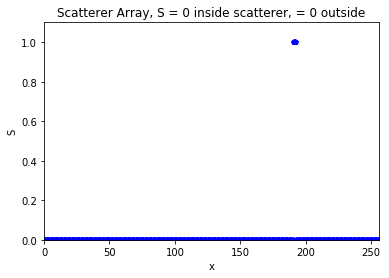

In [8]:
# plot scatterer array
#
plt.xlabel('x')
plt.ylabel('S')
#
plt.xlim(0, Nx)
plt.ylim(0.0, 1.1)
plt.plot(LScatt, color = "b", marker = "p", linestyle = "None") 
#
plt.title('Scatterer Array, S = 0 inside scatterer, = 0 outside')
#
plt.show()

#### <span style="color:blue"> Define Arrays

<span style="color:blue">
array index $\rightarrow x$  <br\>
 
Define Array of values of <br\>
&nbsp; &nbsp; &nbsp;  $n(x)$ <br\>
&nbsp; &nbsp; &nbsp;  $v_0^2 / n_s(x) $ for S-FDTD <br\>
&nbsp; &nbsp; &nbsp;  $\tilde{v}_0^2 / \tilde{n}_s(x) $ for NS-FDTD

In [9]:
Ans = (ns-1.0)*Scatt + 1.0   # Array of refractive index values

In [10]:
Avsq = v0**2 / Ans**2

#### <span style="color:blue"> Define the source turn-on /off and pulse function </span> 
**set the rise / fall time (rft) and pulse duration (pdur)**

In [11]:
rft =  1.0*T          # rise / fall time constant
pdur = 16.0*T         # pulse duration

In [12]:
# turn-on function
def s_on(t):
    if t <= 0.0:
        return 0.0
    if t > 0.0:
        tr = t/rft
        if m.exp(-tr**2) < 0.001:
            return 1.0
        else:
            return 1.0 - m.exp(-tr**2)

In [13]:
# turn-off function
def s_off(t):
    if t > pdur:
        return 0.0
    if 0.0 <= t <= pdur:
        tr = (t - pdur)/rft
        if m.exp(-tr**2) < 0.001:
            return 1.0
        else:
            return 1.0 - m.exp(-tr**2)

In [14]:
# pulse function 
def s_pulse(t):
    if t <= 0.0 or t >= pdur:
        return 0.0
    else:
        return s_on(t)*s_off(t)

**plot turn-on, turn-off, and pulse functions**

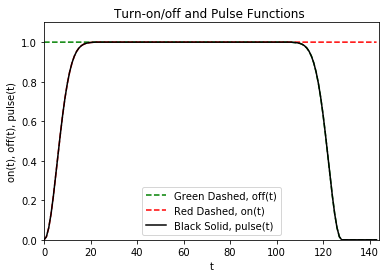

In [15]:
TimeSteps = int(pdur + 2.0*rft)
#
plt.title('Turn-on/off and Pulse Functions ')
#
plt.xlabel('t')
plt.ylabel('on(t), off(t), pulse(t)')
#
plt.xlim(0, TimeSteps)
plt.ylim(0.0, 1.1)
#
Lpulse = [s_pulse(float(its)) for its in range(0,TimeSteps)]
Ls_on = [s_on(float(its)) for its in range(0,TimeSteps)]
Ls_off = [s_off(float(its)) for its in range(0,TimeSteps)]
#
plt.plot(Ls_off, color = "g", linestyle = "--", label='Green Dashed, off(t)')
plt.plot(Ls_on, color = "r", linestyle = "--", label='Red Dashed, on(t)')
plt.plot(Lpulse, linestyle = "-", color = "k", label='Black Solid, pulse(t)')
#
plt.legend(loc = 'best')
#
plt.show()

####  <span style="color:blue"> define source function </span> 
**define scalar source function, source position(s), and the source array function**

In [16]:
def s0(t):                            # scalar source function
        return Amp * m.sin(omega*t)

In [17]:
sp = int(0.125*Nx)                    # source position

# initialize source array
As0 = [0.0 for ix in range(0,Nx+1)]   # this is a list
As0[sp] = 1.0
#
LAs0 = As0                            # list used later for a plot
As0 = np.array(As0)                   # transform into array
#
# if you place this just after the definition of LAs0, the 
# As0 array is also modified
LAs0[sp] = 0.2                        # modify source pount amlitude in list for plotting

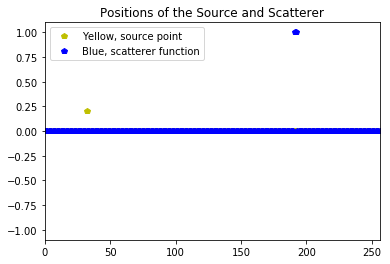

In [18]:
# show scatterer and source array together on a plot
#
plt.title('Positions of the Source and Scatterer')
#
plt.xlim(0, Nx)
plt.ylim(-1.1, 1.1)
#   
plt.plot(LAs0, color = "y", marker = "p", linestyle = "None", label='Yellow, source point')
plt.plot(LScatt, color = "b", marker = "p", linestyle = "None", label='Blue, scatterer function') 
#
plt.legend(loc = 'best')
#
plt.show()

In [19]:
# enable choice: pulse or continuous wave
def modulation(t):
    return s_pulse(t)  # pulse
#    return s_on(t)

In [20]:
# source array function
def As(t):                       
    return s0(t)*modulation(t)*As0

#### <span style="color:blue"> define $d_x^2$

In [21]:
# acts on an array
def dxx(A):
    Af = np.roll(A,1)        # cirular shift to the right
    Ab = np.roll(A,-1)       # cirular shift to the left
    return Af + Ab - 2.0*A  

####  <span style="color:blue"> intialize fields
set $\psi(x,0)$ and $\psi(x,\Delta t)$. In this program we take $\psi(x,0)= \psi(x,\Delta t) = 0 $.</span>

In [22]:
psi0 = [0.0 for i in range(0,Nx+1)]
psi0 = np.array(psi0)
psi1 = psi0
#
t = 1.0     # cumulative floating point time

#### <span style="color:blue"> enter iteration loop 
**<span style="color:red"> You can add more iterations using the same initial fields by repeatedly running the cell below.**</span>  

time step = 8 , wave periods =  1.0 ,  NS-FDTD algorithm


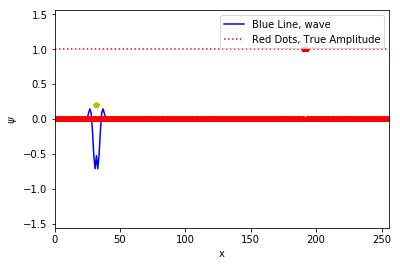

time step = 16 , wave periods =  2.0 ,  NS-FDTD algorithm


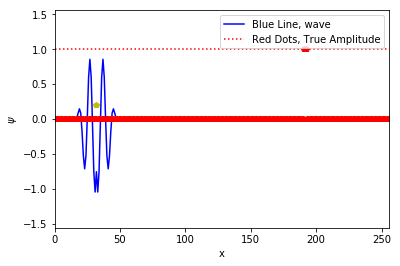

time step = 24 , wave periods =  3.0 ,  NS-FDTD algorithm


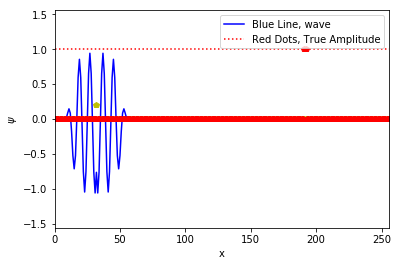

time step = 32 , wave periods =  4.0 ,  NS-FDTD algorithm


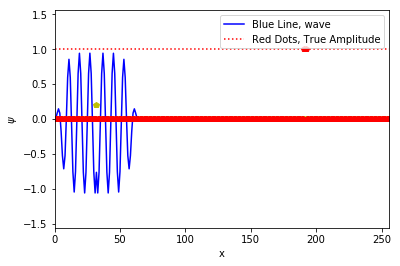

time step = 40 , wave periods =  5.0 ,  NS-FDTD algorithm


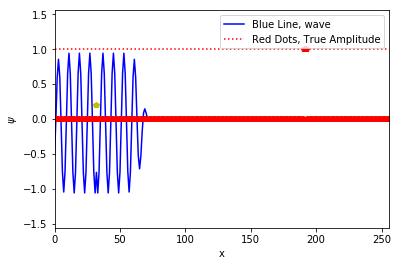

time step = 48 , wave periods =  6.0 ,  NS-FDTD algorithm


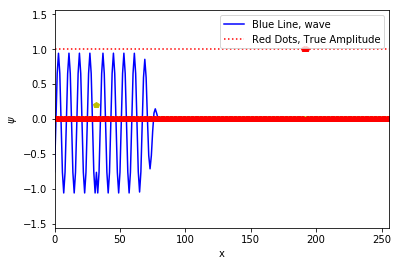

time step = 56 , wave periods =  7.0 ,  NS-FDTD algorithm


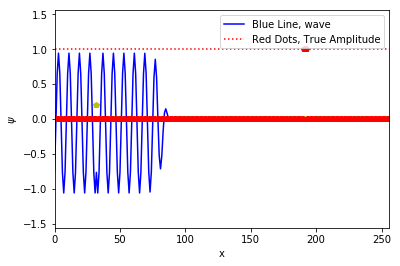

time step = 64 , wave periods =  8.0 ,  NS-FDTD algorithm


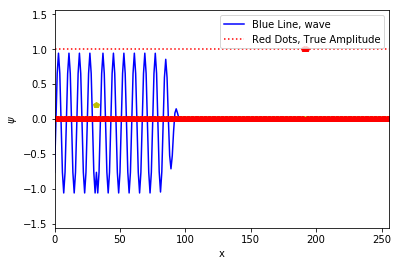

time step = 72 , wave periods =  9.0 ,  NS-FDTD algorithm


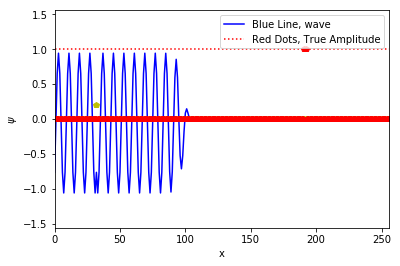

time step = 80 , wave periods =  10.0 ,  NS-FDTD algorithm


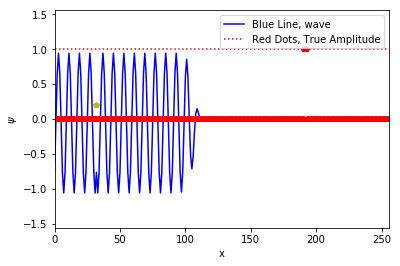

time step = 88 , wave periods =  11.0 ,  NS-FDTD algorithm


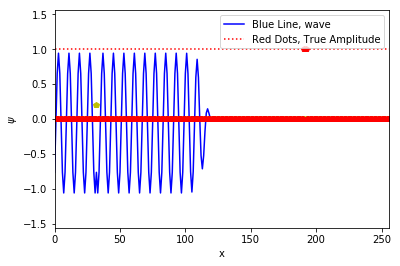

time step = 96 , wave periods =  12.0 ,  NS-FDTD algorithm


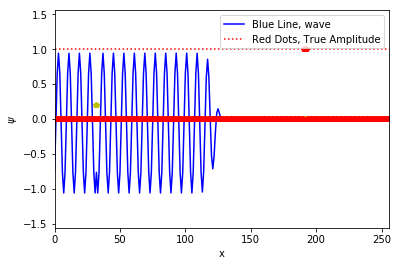

time step = 104 , wave periods =  13.0 ,  NS-FDTD algorithm


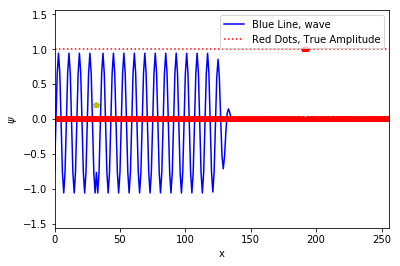

time step = 112 , wave periods =  14.0 ,  NS-FDTD algorithm


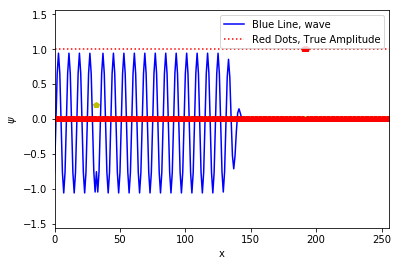

time step = 120 , wave periods =  15.0 ,  NS-FDTD algorithm


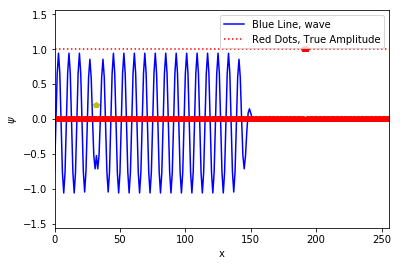

time step = 128 , wave periods =  16.0 ,  NS-FDTD algorithm


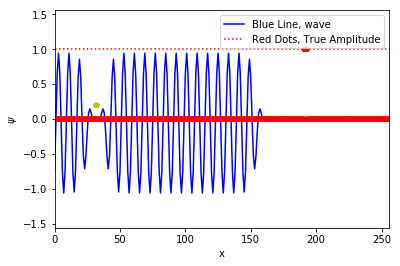

time step = 136 , wave periods =  17.0 ,  NS-FDTD algorithm


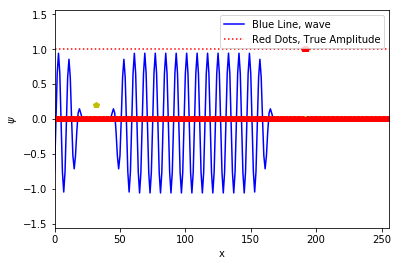

time step = 144 , wave periods =  18.0 ,  NS-FDTD algorithm


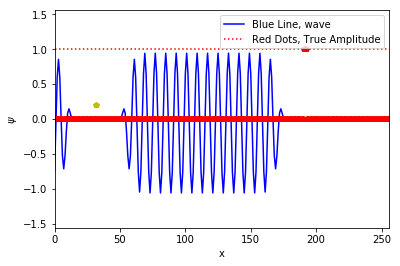

time step = 152 , wave periods =  19.0 ,  NS-FDTD algorithm


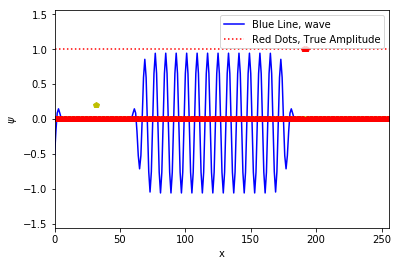

time step = 160 , wave periods =  20.0 ,  NS-FDTD algorithm


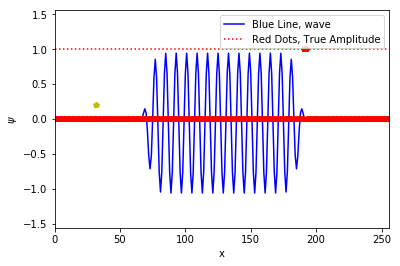

time step = 168 , wave periods =  21.0 ,  NS-FDTD algorithm


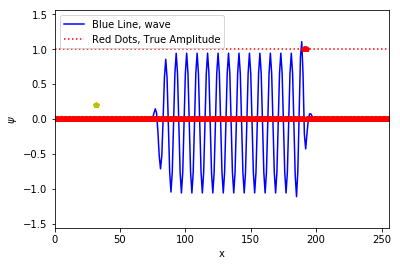

time step = 176 , wave periods =  22.0 ,  NS-FDTD algorithm


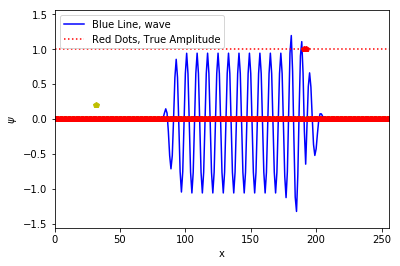

time step = 184 , wave periods =  23.0 ,  NS-FDTD algorithm


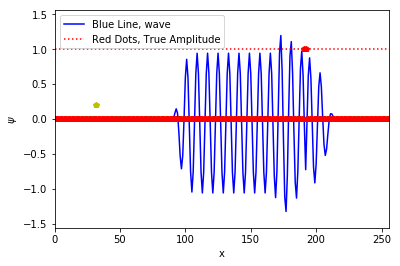

time step = 192 , wave periods =  24.0 ,  NS-FDTD algorithm


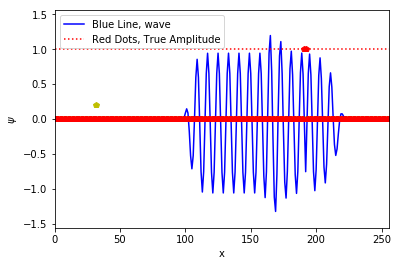

time step = 200 , wave periods =  25.0 ,  NS-FDTD algorithm


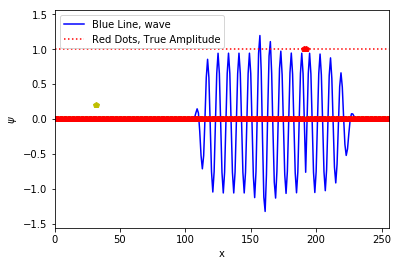

time step = 208 , wave periods =  26.0 ,  NS-FDTD algorithm


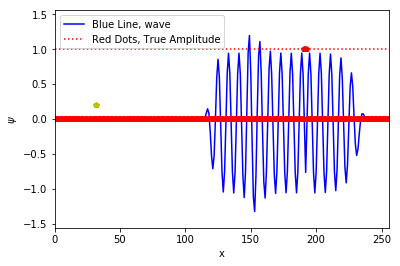

time step = 216 , wave periods =  27.0 ,  NS-FDTD algorithm


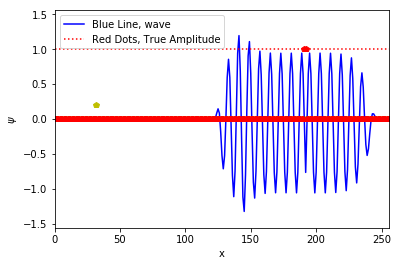

time step = 224 , wave periods =  28.0 ,  NS-FDTD algorithm


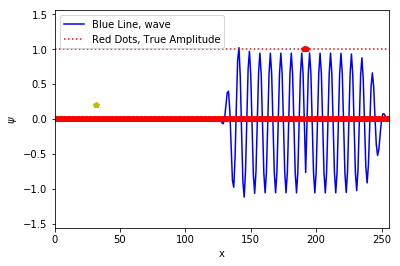

time step = 232 , wave periods =  29.0 ,  NS-FDTD algorithm


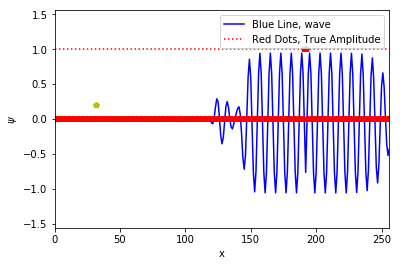

time step = 240 , wave periods =  30.0 ,  NS-FDTD algorithm


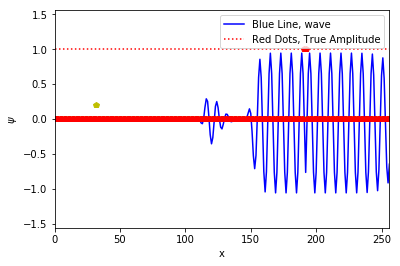

time step = 248 , wave periods =  31.0 ,  NS-FDTD algorithm


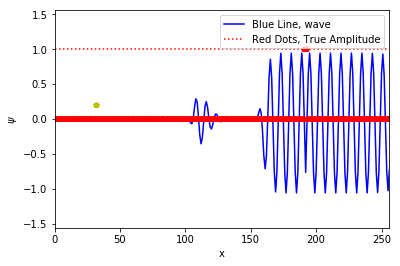

time step = 256 , wave periods =  32.0 ,  NS-FDTD algorithm


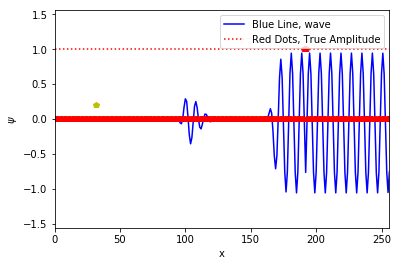

time step = 264 , wave periods =  33.0 ,  NS-FDTD algorithm


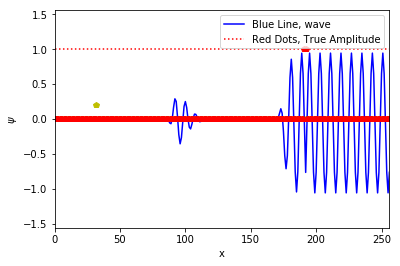

time step = 272 , wave periods =  34.0 ,  NS-FDTD algorithm


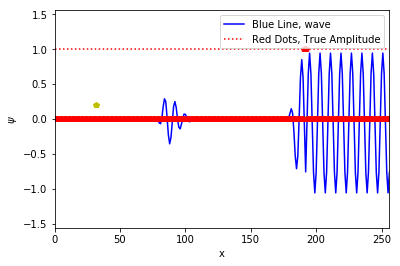

time step = 280 , wave periods =  35.0 ,  NS-FDTD algorithm


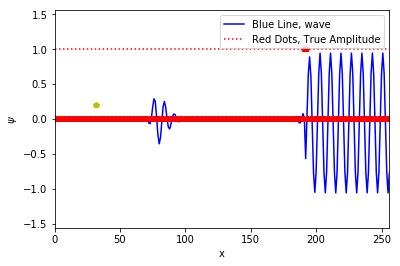

time step = 288 , wave periods =  36.0 ,  NS-FDTD algorithm


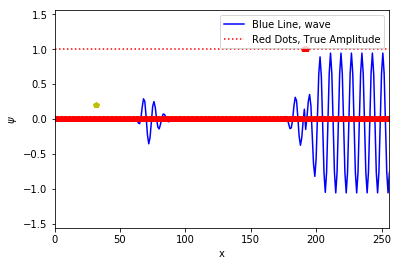

time step = 296 , wave periods =  37.0 ,  NS-FDTD algorithm


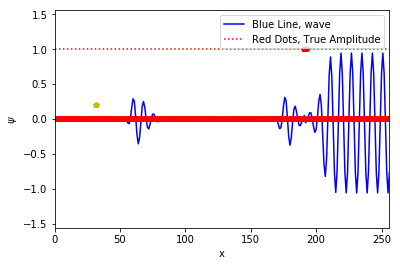

time step = 304 , wave periods =  38.0 ,  NS-FDTD algorithm


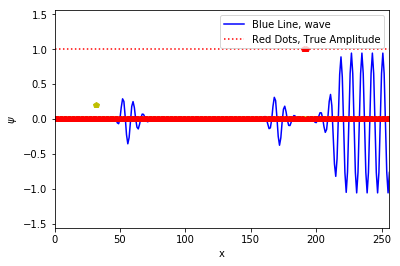

time step = 312 , wave periods =  39.0 ,  NS-FDTD algorithm


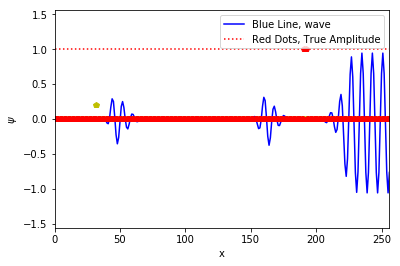

time step = 320 , wave periods =  40.0 ,  NS-FDTD algorithm


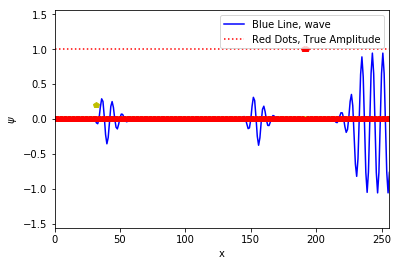

In [23]:
it = 1                # initialize iteration parameter 
Nt = int(40.0*T)      # set number of time steps to iterate

### enter iteration loop ###
#
while it <= Nt : 

### this is the basic FDTD algorithm ###
    psi = -psi0 + 2.0*psi1 + Avsq*dxx(psi1) + As(t)
    
    
### simple absorbing boundary for v = 1.0 ### (more advanced one given in book)
    psi[0] = psi1[1]
    psi[Nx] = psi1[Nx-1]
#
### update wave fields
#
    psi0 = psi1  
    psi1 = psi     
#
#### show plot and print some parameters every wave period ###
    jt = t%float(T)
    if jt == 0:
#set up plots
        Lpsi = psi.tolist()
        plt.xlim(0, Nx)
        plt.ylim(-1.1*Amp, 1.1*Amp)
        plt.xlabel('x')
        plt.ylabel('$\psi $')
#
    
        plt.plot(LAs0, color = "y", marker = "p", linestyle = "None" )
        plt.plot(Lpsi, linestyle = "-", color = "b", label='Blue Line, wave' )
        plt.plot(LScatt, color = "r", marker = "p", linestyle = "None" )
        plt.axhline(y = Amp0, color = "r", linestyle = ":", label='Red Dots, True Amplitude')
        plt.legend(loc = 'best') 
#
        
        per= round(t/T,1)
#
        if Alg ==1:
            print ("time step =", int(t) , ", wave periods = ", per, ",  NS-FDTD algorithm")
        if Alg ==0:
            print ("time step =", int(t),  ", wave periods = ", per, ",  S-FDTD algorithm")
#
        plt.show()
# 
    it = it + 1
    t = t + 1.0